Polinomio que aproxima los puntos dados:
y = 8.8863x^3 + 0.8699x^2 + -0.0345x^1 + -0.0028 + 33.1041

Error relativo promedio: 5.3142%
Máximo error relativo obtenido: 24.2939%


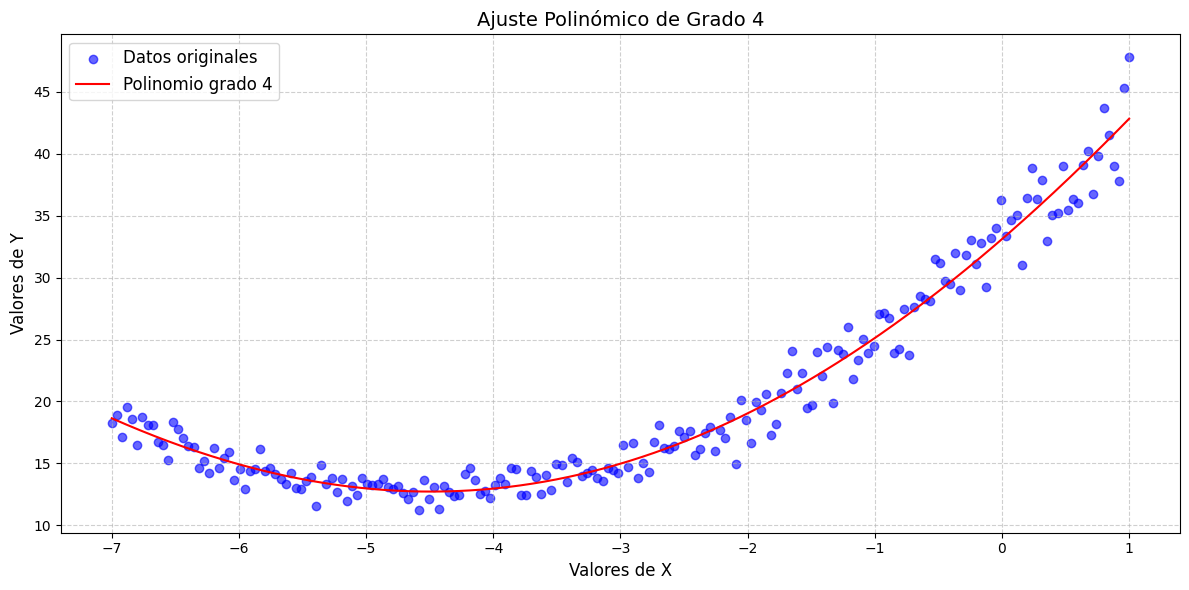

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

data = [
(-7.0, 18.295), (-6.96, 18.924), (-6.92, 17.099), (-6.879, 19.592), (-6.839, 18.568), 
(-6.799, 16.477), (-6.759, 18.783), (-6.719, 18.082), (-6.678, 18.099), (-6.638, 16.696), 
(-6.598, 16.457), (-6.558, 15.253), (-6.518, 18.337), (-6.477, 17.789), (-6.437, 17.014), 
(-6.397, 16.393), (-6.357, 16.286), (-6.317, 14.595), (-6.276, 15.176), (-6.236, 14.259), 
(-6.196, 16.252), (-6.156, 14.637), (-6.116, 15.447), (-6.075, 15.911), (-6.035, 13.627), 
(-5.995, 14.585), (-5.955, 12.948), (-5.915, 14.402), (-5.874, 14.563), (-5.834, 16.175), 
(-5.794, 14.377), (-5.754, 14.59), (-5.714, 14.161), (-5.673, 13.703), (-5.633, 13.377), 
(-5.593, 14.239), (-5.553, 13.006), (-5.513, 12.95), (-5.472, 13.591), (-5.432, 13.893), 
(-5.392, 11.532), (-5.352, 14.877), (-5.312, 13.337), (-5.271, 13.795), (-5.231, 12.723), 
(-5.191, 13.756), (-5.151, 11.947), (-5.111, 13.191), (-5.07, 12.461), (-5.03, 13.801), 
(-4.99, 13.337), (-4.95, 13.225), (-4.91, 13.312), (-4.869, 13.716), (-4.829, 13.061), 
(-4.789, 12.932), (-4.749, 13.159), (-4.709, 12.647), (-4.668, 12.159), (-4.628, 12.693), 
(-4.588, 11.234), (-4.548, 13.657), (-4.508, 12.131), (-4.467, 13.116), (-4.427, 11.28), 
(-4.387, 13.204), (-4.347, 12.681), (-4.307, 12.355), (-4.266, 12.447), (-4.226, 14.183), 
(-4.186, 14.629), (-4.146, 13.632), (-4.106, 12.527), (-4.065, 12.806), (-4.025, 12.193), 
(-3.985, 13.291), (-3.945, 13.825), (-3.905, 13.299), (-3.864, 14.618), (-3.824, 14.539), 
(-3.784, 12.474), (-3.744, 12.456), (-3.704, 14.371), (-3.663, 13.912), (-3.623, 12.522), 
(-3.583, 14.085), (-3.543, 12.861), (-3.503, 14.924), (-3.462, 14.87), (-3.422, 13.489), 
(-3.382, 15.417), (-3.342, 15.143), (-3.302, 14.011), (-3.261, 14.199), (-3.221, 14.469), 
(-3.181, 13.842), (-3.141, 13.583), (-3.101, 14.657), (-3.06, 14.469), (-3.02, 14.213), 
(-2.98, 16.496), (-2.94, 14.685), (-2.899, 16.626), (-2.859, 13.83), (-2.819, 15.049), 
(-2.779, 14.276), (-2.739, 16.734), (-2.698, 18.072), (-2.658, 16.275), (-2.618, 16.2), 
(-2.578, 16.4), (-2.538, 17.622), (-2.497, 17.129), (-2.457, 17.629), (-2.417, 15.697), 
(-2.377, 16.156), (-2.337, 17.454), (-2.296, 17.942), (-2.256, 15.999), (-2.216, 17.687), 
(-2.176, 17.084), (-2.136, 18.711), (-2.095, 14.939), (-2.055, 20.116), (-2.015, 18.477), 
(-1.975, 16.642), (-1.935, 19.969), (-1.894, 19.283), (-1.854, 20.629), (-1.814, 17.274), 
(-1.774, 18.177), (-1.734, 20.677), (-1.693, 22.297), (-1.653, 24.108), (-1.613, 21.001), 
(-1.573, 22.261), (-1.533, 19.508), (-1.492, 19.727), (-1.452, 23.987), (-1.412, 22.089), 
(-1.372, 24.427), (-1.332, 19.869), (-1.291, 24.149), (-1.251, 23.872), (-1.211, 26.017), 
(-1.171, 21.804), (-1.131, 23.37), (-1.09, 25.047), (-1.05, 23.894), (-1.01, 24.512), (-0.97, 27.049), 
(-0.93, 27.149), (-0.889, 26.742), (-0.849, 23.91), (-0.809, 24.265), (-0.769, 27.464), (-0.729, 23.775), 
(-0.688, 27.62), (-0.648, 28.504), (-0.608, 28.295), (-0.568, 28.096), (-0.528, 31.528), (-0.487, 31.188), 
(-0.447, 29.722), (-0.407, 29.521), (-0.367, 31.992), (-0.327, 28.991), (-0.286, 31.823), (-0.246, 33.04), 
(-0.206, 31.061), (-0.166, 32.814), (-0.126, 29.264), (-0.085, 33.214), (-0.045, 33.981), (-0.005, 36.273), 
(0.035, 33.327), (0.075, 34.618), (0.116, 35.065), (0.156, 31.0), (0.196, 36.441), (0.236, 38.878), 
(0.276, 36.338), (0.317, 37.844), (0.357, 32.963), (0.397, 35.057), (0.437, 35.193), (0.477, 39.027), 
(0.518, 35.477), (0.558, 36.345), (0.598, 36.056), (0.638, 39.056), (0.678, 40.193), (0.719, 36.724), 
(0.759, 39.845), (0.799, 43.666), (0.839, 41.484), (0.879, 39.019), (0.92, 37.805), (0.96, 45.267), (1.0, 47.807)
]

X = np.array([point[0] for point in data]).reshape(-1, 1)
y = np.array([point[1] for point in data])

# Ajustar un polinomio de grado 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Obtener los coeficientes del polinomio
coefs = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# Formatear el polinomio
def format_polynomial(coefs, intercept):
    terms = []
    for i, coef in enumerate(coefs):
        power = len(coefs) - i - 1
        if power > 0:
            terms.append(f"{coef:.4f}x^{power}")
        else:
            terms.append(f"{coef:.4f}")
    terms.append(f"{intercept:.4f}")
    return " + ".join(terms)

polynomial_str = format_polynomial(coefs[1:], intercept)

# Predecir valores con el modelo
y_pred = model.predict(X)

# Calcular errores relativos
relative_errors = np.abs((y - y_pred) / y) * 100
average_relative_error = np.mean(relative_errors)
max_relative_error = np.max(relative_errors)

# Mostrar resultados
print("Polinomio que aproxima los puntos dados:")
print(f"y = {polynomial_str}\n")

print(f"Error relativo promedio: {average_relative_error:.4f}%")
print(f"Máximo error relativo obtenido: {max_relative_error:.4f}%")

# Crear gráfico
plt.figure(figsize=(12, 6))

# Graficar puntos originales
plt.scatter(X, y, color='blue', label='Datos originales', alpha=0.6)

# Graficar curva del polinomio ajustado
X_plot = np.linspace(min(X), max(X), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label=f'Polinomio grado {degree}')

# Configuración del gráfico
plt.title('Ajuste Polinómico de Grado 4', fontsize=14)
plt.xlabel('Valores de X', fontsize=12)
plt.ylabel('Valores de Y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.tight_layout()
plt.show()